generate mask

In [10]:
from nilearn.datasets import fetch_neurovault_motor_task
from nilearn.datasets import load_mni152_template
from nilearn.image import load_img

template = load_mni152_template()
template_img = load_img(template)

mask = '/storage/ADHD200/athena/NYU/0010001/mask_wmean_mrda0010001_session_1_rest_1.nii.gz'
mask = load_img(mask)

mean='/storage/ADHD200/athena/NYU/0010001/wmean_mrda0010001_session_1_rest_1.nii.gz'
mean = load_img(mean)

anat='/storage/ADHD200/athena/NYU/0010001/wssd0010001_session_1_anat.nii.gz'
anat = load_img(anat)

rest='/storage/ADHD200/athena/NYU/0010001/sfnwmrda0010001_session_1_rest_1.nii.gz'
rest = load_img(rest)

In [11]:
print(template_img.affine)
print(mask.affine)
print(mean.affine)
print(anat.affine)
print(rest.affine)

[[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
[[  -4.   -0.   -0.   96.]
 [  -0.    4.   -0. -132.]
 [   0.    0.    4.  -70.]
 [   0.    0.    0.    1.]]
[[  -4.   -0.   -0.   96.]
 [  -0.    4.   -0. -132.]
 [   0.    0.    4.  -70.]
 [   0.    0.    0.    1.]]
[[  -1.   -0.   -0.   98.]
 [  -0.    1.   -0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
[[  -4.   -0.   -0.   96.]
 [  -0.    4.   -0. -132.]
 [   0.    0.    4.  -70.]
 [   0.    0.    0.    1.]]


In [12]:
from nilearn.image import resample_to_img

resampled_stat_img = resample_to_img(template, mask)


/home/uga_qinglin/Documents/nilearn-deep/nilearn/image/resampling.py:518: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


In [14]:
print(resampled_stat_img.affine)

[[  -4.   -0.   -0.   96.]
 [  -0.    4.   -0. -132.]
 [   0.    0.    4.  -70.]
 [   0.    0.    0.    1.]]


In [15]:
from nilearn.masking import compute_epi_mask
mask_img = compute_epi_mask(resampled_stat_img)

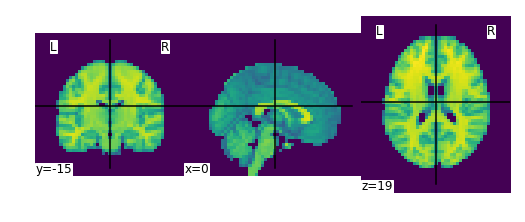

In [16]:
from nilearn import plotting
%matplotlib inline
plotting.plot_img(resampled_stat_img)

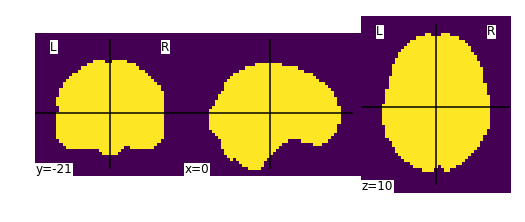

In [17]:
plotting.plot_img(mask_img)

In [18]:
from nilearn.decomposition import CanICA

canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
data=canica.prepare_data(mask_img)
print(data.shape)

[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(49, 58, 47),
affine=array([[  -4.,   -0.,   -0.,   96.],
       [  -0.,    4.,   -0., -132.],
       [   0.,    0.,    4.,  -70.],
       [   0.,    0.,    0.,    1.]])
)]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
<class 'nibabel.nifti1.Nifti1Image'>
data shape (49, 58, 47)
affine: 
[[  -4.   -0.   -0.   96.]
 [  -0.    4.   -0. -132.]
 [   0.    0.    4.  -70.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 49 58 47  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int8
bitpix          : 8
slice_start     : 0
pixdim          : [-1.  4.  4.  4.  1.  1.  1.  1.]
vox_offset      : 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
/home/uga_qinglin/Documents/nilearn-deep/nilearn/signal.py:139: UserWarning: Detrending of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Detrending of 3D signal has been requested but '
/home/uga_qinglin/Documents/nilearn-deep/nilearn/signal.py:51: UserWarning: Standardization of 3D signal has been requested but would lead to zero values. Skipping.
  warnings.warn('Standardization of 3D signal has been requested but '


(1, 28536)


In [19]:
mask_img.to_filename('/home/share/TmpData/Qinglin/ADHD200_Athena_preproc_flirtfix/ADHD200_mask_152_4mm.nii.gz')